In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Carga desde un archivo .csv sin indice
data = pd.read_csv('Euskadi_sin_nulos.csv')
data.head(5)

,Unnamed: 0,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_acceptance_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2024-09-30,city scrape,"Amazing modern, clean & fully equiped flat of...",Gros is Donosti's trendy neighborhood. The apa...,Mikel,2011-05-31,within an hour,1.0,t,...,4.97,4.97,4.94,4.75,t,1,1,0,0,4.62
1,1,2024-09-29,city scrape,Beach front apartment close to San Juan de Gaz...,No overview available,Maitane,2011-06-12,within an hour,1.0,t,...,4.51,4.63,4.70,4.70,t,1,1,0,0,0.50
2,2,2024-09-30,city scrape,The apartment is located in the mezzanine of a...,In this neighborhood with a strong personality...,Emy,2012-01-10,within an hour,0.9,f,...,4.67,4.44,5.00,4.20,t,7,6,1,0,0.13
3,3,2024-09-30,city scrape,No description available,The apartment is located in the Romantic Area ...,Emy,2012-01-10,within an hour,0.9,f,...,4.83,4.92,4.92,4.58,t,7,6,1,0,0.09
4,4,2024-09-30,city scrape,No description available,The apartment is located in the area known as ...,Emy,2012-01-10,within an hour,0.9,f,...,4.75,4.71,4.81,4.75,f,7,6,1,0,0.11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6891 entries, 0 to 6890
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6891 non-null   int64  
 1   last_scraped                                  6891 non-null   object 
 2   source                                        6891 non-null   object 
 3   description                                   6891 non-null   object 
 4   neighborhood_overview                         6891 non-null   object 
 5   host_name                                     6891 non-null   object 
 6   host_since                                    6891 non-null   object 
 7   host_response_time                            6891 non-null   object 
 8   host_acceptance_rate                          6891 non-null   float64
 9   host_is_superhost                             6891 non-null   o

In [4]:
#Corroboramos valores nulos del dataframe
valores_nulos = data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0


In [84]:
cuantitativas = data.iloc[:, np.r_[8, 11, 16, 17, 20, 22, 23, 25:34, 36:45, 46:51]]  # Columnas específicas
cualitativas = data.iloc[:, np.r_[0:8, 9, 10, 12:16, 17:20, 21, 24, 35, 45]] 

<Figure size 1500x800 with 0 Axes>

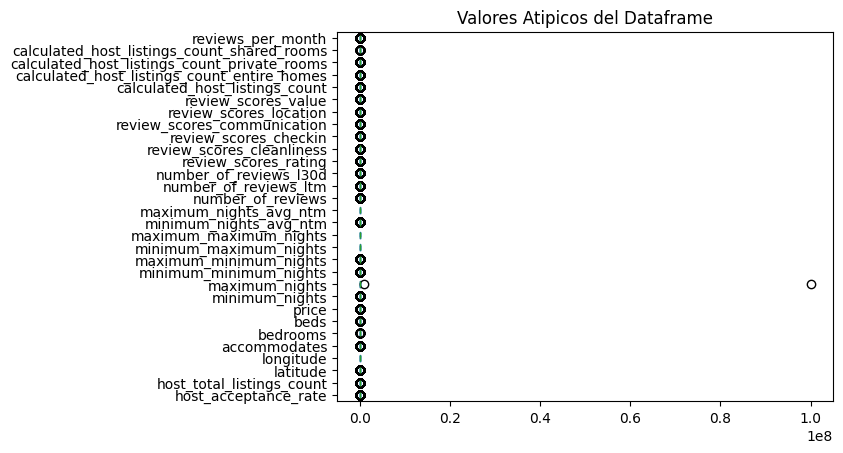

In [85]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig= plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #Dibujamos el diagrama

**Desviaciooon**

In [86]:
#Realizamos 
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_acceptance_rate                            1.568477e+00
host_total_listings_count                       2.663175e+02
latitude                                        4.372494e+01
longitude                                      -1.180653e+00
accommodates                                    1.107902e+01
bedrooms                                        5.684981e+00
beds                                            9.415583e+00
price                                           1.219380e+03
minimum_nights                                  3.074623e+01
maximum_nights                                  3.629310e+06
minimum_minimum_nights                          3.199019e+01
maximum_minimum_nights                          5.179752e+01
minimum_maximum_nights                          2.019193e+03
maximum_maximum_nights                          2.056626e+03
minimum_nights_avg_ntm                          4.016185e+01
maximum_nights_avg_ntm                          1.997277e+0

In [87]:
#Obtenemos datos y los outliders se convierten en nulos en el Dataframe
data3 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data3

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,1.0,43.324750,-1.973350,4.0,2.0,3.0,191.0,2.0,63.0,...,4.77,4.97,4.97,4.94,4.75,1.0,1.0,0.0,0.0,4.62
1,1.00,4.0,43.392430,-2.694740,4.0,1.0,3.0,160.0,2.0,730.0,...,4.91,4.51,4.63,4.70,4.70,1.0,1.0,0.0,0.0,0.50
2,0.90,10.0,43.315800,-2.005980,6.0,2.0,4.0,209.0,7.0,365.0,...,4.13,4.67,4.44,5.00,4.20,7.0,6.0,1.0,0.0,0.13
3,0.90,10.0,43.316630,-1.986160,8.0,3.0,5.0,261.0,NaN,280.0,...,4.83,4.83,4.92,4.92,4.58,7.0,6.0,1.0,0.0,0.09
4,0.90,10.0,43.316810,-1.986110,8.0,3.0,5.0,261.0,NaN,124.0,...,4.82,4.75,4.71,4.81,4.75,7.0,6.0,1.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,0.65,4.0,43.331609,-3.004281,4.0,2.0,2.0,150.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,4.0,2.0,2.0,0.0,1.00
6887,1.00,1.0,43.318363,-1.980869,1.0,1.0,1.0,50.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0,1.00
6888,1.00,216.0,43.326260,-1.972220,6.0,3.0,3.0,204.0,2.0,365.0,...,4.80,4.80,4.80,4.70,4.60,NaN,NaN,0.0,0.0,1.00
6889,1.00,4.0,43.406106,-2.947055,4.0,2.0,3.0,215.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,4.0,4.0,0.0,0.0,1.00


In [88]:
#Corroboramos valores nulos del dataframe
valores_nulos = data3.isnull().sum()
valores_nulos

host_acceptance_rate                            299
host_total_listings_count                        98
latitude                                        150
longitude                                         0
accommodates                                    144
bedrooms                                        114
beds                                            106
price                                            20
minimum_nights                                  139
maximum_nights                                    1
minimum_minimum_nights                          118
maximum_minimum_nights                          128
minimum_maximum_nights                            0
maximum_maximum_nights                            0
minimum_nights_avg_ntm                           89
maximum_nights_avg_ntm                            0
number_of_reviews                               160
number_of_reviews_ltm                           166
number_of_reviews_l30d                          183
review_score

In [89]:
#Reemplazamoos cvalores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean= data3.copy()
data_clean= data_clean.fillna(round(data3.mean(),1))
data_clean

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,1.0,43.324750,-1.973350,4.0,2.0,3.0,191.0,2.0,63.0,...,4.77,4.97,4.97,4.94,4.75,1.0,1.0,0.0,0.0,4.62
1,1.00,4.0,43.392430,-2.694740,4.0,1.0,3.0,160.0,2.0,730.0,...,4.91,4.51,4.63,4.70,4.70,1.0,1.0,0.0,0.0,0.50
2,0.90,10.0,43.315800,-2.005980,6.0,2.0,4.0,209.0,7.0,365.0,...,4.13,4.67,4.44,5.00,4.20,7.0,6.0,1.0,0.0,0.13
3,0.90,10.0,43.316630,-1.986160,8.0,3.0,5.0,261.0,2.3,280.0,...,4.83,4.83,4.92,4.92,4.58,7.0,6.0,1.0,0.0,0.09
4,0.90,10.0,43.316810,-1.986110,8.0,3.0,5.0,261.0,2.3,124.0,...,4.82,4.75,4.71,4.81,4.75,7.0,6.0,1.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,0.65,4.0,43.331609,-3.004281,4.0,2.0,2.0,150.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,4.0,2.0,2.0,0.0,1.00
6887,1.00,1.0,43.318363,-1.980869,1.0,1.0,1.0,50.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0,1.00
6888,1.00,216.0,43.326260,-1.972220,6.0,3.0,3.0,204.0,2.0,365.0,...,4.80,4.80,4.80,4.70,4.60,6.5,4.7,0.0,0.0,1.00
6889,1.00,4.0,43.406106,-2.947055,4.0,2.0,3.0,215.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,4.0,4.0,0.0,0.0,1.00


In [90]:
#Corroboramos valores nulos del dataframe
valores_nulos = data_clean.isnull().sum()
valores_nulos

host_acceptance_rate                            0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0


**CUARTILEEEEEEEEES**

In [91]:
#Metodo aplicando cuartiles, encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentiles25= y.quantile(0.25) #Q1
percentiles75= y.quantile(0.75) #Q2
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr

print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate                               1.150000
host_total_listings_count                         23.500000
latitude                                          43.423656
longitude                                         -0.575133
accommodates                                       9.500000
bedrooms                                           6.000000
beds                                               8.500000
price                                            312.500000
minimum_nights                                     3.500000
maximum_nights                                  2646.000000
minimum_minimum_nights                             3.500000
maximum_minimum_nights                             7.000000
minimum_maximum_nights                          2677.500000
maximum_maximum_nights                          2265.000000
minimum_nights_avg_ntm                             5.550000
maximum_nights_avg_ntm                          2266.500000
number_of_revi

In [92]:
#Obtenemos dato slimpios del Dataframe
data3_iqr = cuantitativas[(y <= Limite_Superior_iqr)&(y >= Limite_Inferior_iqr)]
data3_iqr

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,1.0,43.324750,-1.973350,4.0,2.0,3.0,191.0,2.0,63.0,...,4.77,4.97,4.97,4.94,4.75,1.0,1.0,0.0,0.0,NaN
1,1.0,4.0,43.392430,-2.694740,4.0,1.0,3.0,160.0,2.0,730.0,...,4.91,4.51,4.63,4.70,4.70,1.0,1.0,0.0,0.0,0.50
2,0.9,10.0,43.315800,-2.005980,6.0,2.0,4.0,209.0,NaN,365.0,...,NaN,4.67,NaN,5.00,4.20,7.0,6.0,1.0,0.0,0.13
3,0.9,10.0,43.316630,-1.986160,8.0,3.0,5.0,261.0,NaN,280.0,...,4.83,4.83,4.92,4.92,4.58,7.0,6.0,1.0,0.0,0.09
4,0.9,10.0,43.316810,-1.986110,8.0,3.0,5.0,261.0,NaN,124.0,...,4.82,4.75,4.71,4.81,4.75,7.0,6.0,1.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,NaN,4.0,43.331609,-3.004281,4.0,2.0,2.0,150.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,4.0,2.0,2.0,0.0,1.00
6887,1.0,1.0,43.318363,-1.980869,1.0,1.0,1.0,50.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0,1.00
6888,1.0,NaN,43.326260,-1.972220,6.0,3.0,3.0,204.0,2.0,365.0,...,4.80,4.80,4.80,4.70,4.60,NaN,NaN,0.0,0.0,1.00
6889,1.0,4.0,43.406106,-2.947055,4.0,2.0,3.0,215.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,4.0,4.0,0.0,0.0,1.00


In [93]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

host_acceptance_rate                             932
host_total_listings_count                        981
latitude                                         851
longitude                                          0
accommodates                                     197
bedrooms                                          43
beds                                             132
price                                            534
minimum_nights                                   708
maximum_nights                                     2
minimum_minimum_nights                           647
maximum_minimum_nights                           539
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                           666
maximum_nights_avg_ntm                             0
number_of_reviews                                683
number_of_reviews_ltm                            574
number_of_reviews_l30d                        

In [94]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del datafraame
data4_iqr= data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,1.0,43.324750,-1.973350,4.0,2.0,3.0,191.0,2.0,63.0,...,4.77,4.97,4.97,4.94,4.75,1.0,1.0,0.0,0.0,1.10
1,1.0,4.0,43.392430,-2.694740,4.0,1.0,3.0,160.0,2.0,730.0,...,4.91,4.51,4.63,4.70,4.70,1.0,1.0,0.0,0.0,0.50
2,0.9,10.0,43.315800,-2.005980,6.0,2.0,4.0,209.0,1.6,365.0,...,4.80,4.67,4.90,5.00,4.20,7.0,6.0,1.0,0.0,0.13
3,0.9,10.0,43.316630,-1.986160,8.0,3.0,5.0,261.0,1.6,280.0,...,4.83,4.83,4.92,4.92,4.58,7.0,6.0,1.0,0.0,0.09
4,0.9,10.0,43.316810,-1.986110,8.0,3.0,5.0,261.0,1.6,124.0,...,4.82,4.75,4.71,4.81,4.75,7.0,6.0,1.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,1.0,4.0,43.331609,-3.004281,4.0,2.0,2.0,150.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,4.0,2.0,2.0,0.0,1.00
6887,1.0,1.0,43.318363,-1.980869,1.0,1.0,1.0,50.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0,1.00
6888,1.0,4.2,43.326260,-1.972220,6.0,3.0,3.0,204.0,2.0,365.0,...,4.80,4.80,4.80,4.70,4.60,3.1,1.2,0.0,0.0,1.00
6889,1.0,4.0,43.406106,-2.947055,4.0,2.0,3.0,215.0,1.0,365.0,...,4.80,4.80,4.80,4.70,4.60,4.0,4.0,0.0,0.0,1.00


In [95]:
#Unimos el dataframe cuantitativo con el dataframe cualitativo

Datos_limpios = pd. concat([cualitativas, data4_iqr], axis = 1)
Datos_limpios

,Unnamed: 0,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_is_superhost,host_neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2024-09-30,city scrape,"Amazing modern, clean & fully equiped flat of...",Gros is Donosti's trendy neighborhood. The apa...,Mikel,2011-05-31,within an hour,t,Unknown,...,4.77,4.97,4.97,4.94,4.75,1.0,1.0,0.0,0.0,1.10
1,1,2024-09-29,city scrape,Beach front apartment close to San Juan de Gaz...,No overview available,Maitane,2011-06-12,within an hour,t,La Latina,...,4.91,4.51,4.63,4.70,4.70,1.0,1.0,0.0,0.0,0.50
2,2,2024-09-30,city scrape,The apartment is located in the mezzanine of a...,In this neighborhood with a strong personality...,Emy,2012-01-10,within an hour,f,Unknown,...,4.80,4.67,4.90,5.00,4.20,7.0,6.0,1.0,0.0,0.13
3,3,2024-09-30,city scrape,No description available,The apartment is located in the Romantic Area ...,Emy,2012-01-10,within an hour,f,Unknown,...,4.83,4.83,4.92,4.92,4.58,7.0,6.0,1.0,0.0,0.09
4,4,2024-09-30,city scrape,No description available,The apartment is located in the area known as ...,Emy,2012-01-10,within an hour,f,Unknown,...,4.82,4.75,4.71,4.81,4.75,7.0,6.0,1.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,6886,2024-09-30,city scrape,Apt walking distance to Getxo beach and marina,No overview available,Gorka,2018-11-22,within an hour,f,Unknown,...,4.80,4.80,4.80,4.70,4.60,4.0,2.0,2.0,0.0,1.00
6887,6887,2024-09-30,city scrape,Enjoy the simplicity of this quiet and central...,No overview available,Josselyn Jolibeth,2024-09-11,within an hour,f,Unknown,...,4.80,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0,1.00
6888,6888,2024-09-30,city scrape,MONTHLY RENTAL. (Minimum stay is 32 nights),No overview available,Alfonso Carlos,2017-04-03,within an hour,t,Unknown,...,4.80,4.80,4.80,4.70,4.60,3.1,1.2,0.0,0.0,1.00
6889,6889,2024-09-29,city scrape,Nice Flat with views of the port,No overview available,Acme,2023-06-13,within an hour,f,Unknown,...,4.80,4.80,4.80,4.70,4.60,4.0,4.0,0.0,0.0,1.00


In [96]:
#Corroboramos calores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_is_superhost                               0
host_neighbourhood                              0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
longitude                                       0
property_type                                   0
room_type                                       0
bathrooms_text                                  0
amenities                                       0
calendar_last_scraped                           0


In [97]:
#Convertir Dataframa a CSV
Datos_limpios.to_csv("Euskadi_limpio.csv")